In [1]:
#Mengimport package yang di butuhkan, menggunakan tensorflow dengan library keras
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [2]:
#Mengunduh data dari dicoding berupa ekstension .zip
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-07-29 14:58:36--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  5.75MB/s    in 73s     

2020-07-29 14:59:50 (4.22 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [31]:
#Mengekstrak data pada file berekstension .zip
import os
import zipfile
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [33]:
#Memulai split dataset
#Menentukan bagian base dir,train dir dan validation dir
base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [32]:
#Membuat direktori untuk train dir dan validation dir
if not os.path.exists(train_dir):
  os.mkdir(train_dir)
if not os.path.exists(validation_dir):
  os.mkdir(validation_dir)

In [34]:
#Membuat direktori dari base dir untuk rock, paper, scissors
direktori_rock = os.path.join(base_dir,'rock')
direktori_paper = os.path.join(base_dir, 'paper')
direktori_scissors = os.path.join(base_dir, 'scissors')

In [35]:
#Melihat folder rockpaperscissors beserta direktori yang telah dibuat
os.listdir('/tmp/rockpaperscissors')

['paper',
 'train',
 'scissors',
 'rps-cv-images',
 'rock',
 'val',
 'README_rpc-cv-images.txt']

In [39]:
#Menghitung jumlah data keseluruhan
total_rock=len(os.listdir('/tmp/rockpaperscissors/rock'))
total_paper=len(os.listdir('/tmp/rockpaperscissors/paper'))
total_scissors=len(os.listdir('/tmp/rockpaperscissors/scissors'))
total=total_rock + total_paper + total_scissors
total

2188

In [7]:
#Membagi data menjadi 60% data train dan 40% data validation
#Membagi direktori rock menjadi data train dan data validation
train_rock, val_rock = train_test_split(os.listdir(direktori_rock), test_size = 0.4)
#Membagi direktori paper menjadi data train dan data validation
train_paper, val_paper = train_test_split(os.listdir(direktori_paper), test_size = 0.4)
#Membagi direktori scissors menjadi data train dan data validation
train_scissors, val_scissors = train_test_split(os.listdir(direktori_scissors), test_size = 0.4)

In [40]:
#Membuat variabel train untuk menyimpan data yang sudah dibagi 60% untuk setiap sub direktori
var_train_rock = os.path.join(train_dir, 'rock')
var_train_paper = os.path.join(train_dir, 'paper')
var_train_scissors = os.path.join(train_dir, 'scissors')

In [41]:
#Membuat variabel validation untuk menyimpan data yang sudah dibagi 40% untuk setiap sub direktori
var_val_rock = os.path.join(validation_dir, 'rock')
var_val_paper = os.path.join(validation_dir, 'paper')
var_val_scissors = os.path.join(validation_dir, 'scissors')

In [8]:
#Jumlah data train rock yang sudah dibagi menjadi 60%
len(train_rock)

435

In [9]:
#Jumlah data validation rock yang sudah dibagi menjadi 40%
len(val_rock)

291

In [10]:
#Jumlah data train paper yang sudah dibagi menjadi 60%
len(train_paper)

427

In [11]:
#Jumlah data validation paper yang sudah dibagi menjadi 40%
len(val_paper)

285

In [12]:
#Jumlah data train scissors yang sudah dibagi menjadi 60%
len(train_scissors)

450

In [13]:
#Jumlah data validation scissors yang sudah dibagi menjadi 40%
len(val_scissors)

300

In [42]:
#Melihat isi dari data validation
os.listdir('/tmp/rockpaperscissors/val')

['paper', 'scissors', 'rock']

In [15]:
#Membuat direktori untuk menyimpan data variabel train
if not os.path.exists(var_train_rock):
  os.mkdir(var_train_rock)
if not os.path.exists(var_train_paper):
  os.mkdir(var_train_paper)
if not os.path.exists(var_train_scissors):
  os.mkdir(var_train_scissors)

In [ ]:
#Membuat direktori untuk menyimpan data variabel validation
if not os.path.exists(var_val_rock):
  os.mkdir(var_val_rock)
if not os.path.exists(var_val_paper):
  os.mkdir(var_val_paper)
if not os.path.exists(var_val_scissors):
  os.mkdir(var_val_scissors)

In [16]:
#Memindahkan data train dan data validation ke directori baru setiap sub direktori
import shutil

for i in train_rock:
  shutil.copy(os.path.join(direktori_rock, i), os.path.join(var_train_rock, i))
for i in train_paper:
  shutil.copy(os.path.join(direktori_paper,i), os.path.join(var_train_paper,i))
for i in train_scissors:
  shutil.copy(os.path.join(direktori_scissors,i), os.path.join(var_train_scissors,i))

for i in val_rock:
  shutil.copy(os.path.join(direktori_rock, i), os.path.join(var_val_rock,i))
for i in val_paper:
  shutil.copy(os.path.join(direktori_paper,i), os.path.join(var_val_paper,i))
for i in val_scissors:
  shutil.copy(os.path.join(direktori_scissors,i), os.path.join(var_val_scissors,i))

In [44]:
#Menghitung jumlah data training keseluruhan
total_trainrock=len(os.listdir('/tmp/rockpaperscissors/train/rock'))
total_trainpaper=len(os.listdir('/tmp/rockpaperscissors/train/paper'))
total_trainscissors=len(os.listdir('/tmp/rockpaperscissors/train/scissors'))
total_train = total_trainrock + total_trainpaper + total_trainscissors
total_train

1312

In [46]:
#Menghitung jumlah data validation keseluruhan
total_valrock=len(os.listdir('/tmp/rockpaperscissors/val/rock'))
total_valpaper=len(os.listdir('/tmp/rockpaperscissors/val/paper'))
total_valscissors=len(os.listdir('/tmp/rockpaperscissors/val/scissors'))
total_val = total_valrock + total_valpaper + total_valscissors
total_val

876

In [45]:
#Menghitung jumlah data training rock
len(os.listdir('/tmp/rockpaperscissors/train/rock'))

435

In [17]:
#Menghitung jumlah data training paper
len(os.listdir('/tmp/rockpaperscissors/train/paper'))

427

In [19]:
#Menghitung jumlah data training scissors
len(os.listdir('/tmp/rockpaperscissors/train/scissors'))

450

In [47]:
#Menghitung jumlah data validation rock
len(os.listdir('/tmp/rockpaperscissors/val/rock'))

291

In [48]:
#Menghitung jumlah data validation paper
len(os.listdir('/tmp/rockpaperscissors/val/paper'))

285

In [49]:
#Menghitung jumlah data validation scissors
len(os.listdir('/tmp/rockpaperscissors/val/scissors'))

300

In [23]:
#Image Augmentation pada setiap gambar
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    zoom_range=0.2,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    validation_split=0.2)
 
validation_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    zoom_range=0.2,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    validation_split=0.2
                    )

In [50]:
#Menggunakan objek image data generator sebelumnya untuk mempersiapkan data latih
train_generator = train_datagen.flow_from_directory(
        train_dir,               #direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=32,
        shuffle=True,
        class_mode='categorical')
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir,         # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=32,
        class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [25]:
#Membuat model 
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(256,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

In [59]:
#Melakukan perhentian jika telah mencapai 90%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.96):
      print("\nAkurasi telah mencapai 96%\nMaka train data telah diberhentikan !")
      self.model.stop_training = True

callbacks = myCallback()

In [60]:
#Memanggil fungsi compile pada objek model
#Dan menententukan loss function serta optimizer
model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics=['accuracy'])

In [61]:
#Melatih model menggunakan metode fit
model.fit(
      train_generator,
      steps_per_epoch=25,  #Berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20,
      validation_data=validation_generator, #Menampilkan akurasi pengujian data validasi
      validation_steps=5,  #Berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2,
      callbacks=[callbacks] #Silahkan di comment untuk proses sequential menyeluruh
)

Epoch 1/20

Akurasi telah mencapai 96%
Maka train data telah diberhentikan !
25/25 - 43s - loss: 0.0170 - accuracy: 0.9950 - val_loss: 0.2402 - val_accuracy: 0.9688


Saving WhatsApp Image 2020-07-29 at 23.39.43.jpeg to WhatsApp Image 2020-07-29 at 23.39.43.jpeg
WhatsApp Image 2020-07-29 at 23.39.43.jpeg
paper


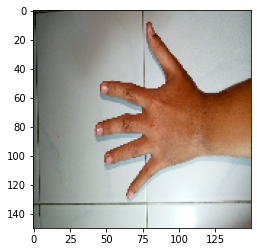

In [57]:
#Prediksi dari model
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  #Prediksi Gambar
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')